<a href="https://colab.research.google.com/github/datadigger01/datamining/blob/main/MultiLinearR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # to draw graphs
import seaborn as sns
%matplotlib inline

In [71]:
df = pd.read_csv('/content/drive/MyDrive/데이터마이닝수업/Data/BostonHousing.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


In [184]:
#타겟/종속변수
label =['MEDV']
#Feature/독립변수/설명변수
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

## 설명모델
   + 전체데이터를 이용
   + 데이터가 모델에 잘 적합되게
   + 회귀계수 추정에 초점

In [156]:
from statsmodels.formula.api import ols

ols_model = ols(formula='MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT', data=df).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 05 Nov 2023   Prob (F-statistic):          6.72e-135
Time:                        02:24:58   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

#### 입력변수/설명변수/독립변수 표준화

In [191]:
from sklearn.preprocessing import StandardScaler

std_var = StandardScaler().fit_transform(df[features])
df_std = pd.concat([pd.DataFrame(std_var, columns=features), df[label]], axis=1)
df_std

#ols_std_model = ols(formula='MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT', data=df_std).fit()
#print(ols_std_model.summary())

#std_tgt = StandardScaler().fit_transform(df[label])
#df_std = pd.concat([pd.DataFrame(std_var, columns=features), pd.DataFrame(std_tgt, columns=label)], axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.4
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,20.6
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,23.9
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,22.0


# 예측모델
  + 정확하게 예측하는 것을 목적
  + 새로운 사례에 대한 정확한 예측을 위해 학습(Train) 데이터와  검증(Test) 데이터로 구분, 학습을 모델 추정에, 검증은 예측성능 평가에 사용
  + 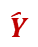 에 촛점

In [74]:
from sklearn.model_selection import train_test_split

# Splitting data for taining and testing
X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.20, random_state=22)

In [99]:
from sklearn.linear_model import LinearRegression

In [91]:
linear_model = LinearRegression(fit_intercept=True).fit(X_train, y_train)

In [200]:
coef_tb = pd.concat([pd.DataFrame(linear_model.coef_, columns=['Coefficient']), pd.DataFrame(linear_model.feature_names_in_, columns=['Variable'])], axis=1)
inter_tb = pd.concat([pd.Series('Intercept',name='Variable'), pd.Series(linear_model.intercept_, name='Coefficient')], axis=1)

result_tb = pd.concat([inter_tb, coef_tb], axis=0,ignore_index=True)
result_tb

,Variable,Coefficient
0,Intercept,32.428253
1,CRIM,-0.101200
2,ZN,0.046796
3,INDUS,-0.020690
4,CHAS,3.580723
5,NOX,-17.128892
6,RM,3.922073
7,AGE,-0.005680
8,DIS,-1.548623
9,RAD,0.297157


In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
linear_model.predict(X_test)

array([27.99617259, 31.37458822, 21.16274236, 32.97684211, 19.85350998,
       19.20417092, 21.07981458, 19.43179838, 19.55995513, 32.46251423,
       20.95643087, 27.76018784, 15.39262695, 19.6442985 , 36.52126959,
       18.64394966,  8.93258608, 18.30021084, 30.44252024, 24.30768161,
       19.25674385, 33.77398082, 29.85656182, 17.6870715 , 34.76784961,
       26.40009819, 34.60438567, 27.32689821, 19.24589917, 14.83463871,
       30.57090061, 15.46969575, 37.09516033,  7.00967398, 16.15634365,
       17.44040193,  7.35639245, 20.22713119, 40.76195302, 28.77723574,
       25.15616291, 17.83858135, 39.41405113,  7.01259096, 22.06502935,
       25.1857296 , 20.23571567, 20.29713521, 17.46268122, 26.21457012,
        8.54093689, 27.39499407, 30.85069122, 16.66356032,  9.32950573,
       35.17417878, 32.19041763, 21.85580143, 17.42877945, 21.9784194 ,
       23.49485953, 23.98615371, 19.99362404, 38.29415052, 24.6854627 ,
       20.00405044, 13.97439271,  6.75563393, 42.12286805, 21.90

## 예측모형의 성능평가
   + MAE(Mean Absolute Error)
   + MSE(Mean Squared Error)
   + MAPE(Mean Absolute Percentage Error)
   + RMSE(Root Mean Squared Error)

In [98]:
print("MAE  :", mean_absolute_error(linear_model.predict(X_test), y_test))
print("MAPE :", mean_absolute_percentage_error(linear_model.predict(X_test), y_test))
print("MSE  :", mean_squared_error(linear_model.predict(X_test), y_test))
print("RMSE :", mean_squared_error(linear_model.predict(X_test), y_test)**0.5)

MAE  : 3.4251818718533604
MAPE : 0.15714296075141598
MSE  : 20.770684784270053
RMSE : 4.557486674063902


## 예측을 위한 기타 선형회귀모형
   + Ridge Regression
   + Lasso Regression
   + ElasticNet Regression

In [100]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [153]:
lasso_reg = Lasso(alpha=1).fit(X_train, y_train)
ridge_reg = Ridge(alpha=1).fit(X_train, y_train)
elasticnet_reg = ElasticNet(alpha=1).fit(X_train, y_train)

In [154]:
pd.concat([pd.DataFrame(ridge_reg.feature_names_in_, columns=['variable']),
           pd.DataFrame(ridge_reg.coef_, columns=['ridge_coef']),
           pd.DataFrame(lasso_reg.coef_, columns=['lasso_coef']),
           pd.DataFrame(elasticnet_reg.coef_, columns=['elasticnet_coef'])], axis=1)

,variable,ridge_coef,lasso_coef,elasticnet_coef
0,CRIM,-0.094805,-0.048510,-0.076822
1,ZN,0.047716,0.050121,0.051483
2,INDUS,-0.054913,-0.019728,-0.053414
3,CHAS,3.318222,0.000000,0.000000
4,NOX,-9.584468,-0.000000,-0.000000
5,RM,3.967025,1.016376,0.944949
6,AGE,-0.012140,0.005475,0.006934
7,DIS,-1.441320,-0.806827,-0.874943
8,RAD,0.279695,0.251334,0.292403
9,TAX,-0.010701,-0.013761,-0.014321


## 모형별 예측성능 비교

In [155]:
print("====================== MAE ================")
print("Ridge_MAE  :", mean_absolute_error(ridge_reg.predict(X_test), y_test))
print("Lasso_MAE  :", mean_absolute_error(lasso_reg.predict(X_test), y_test))
print("Elastic_MAE:", mean_absolute_error(elasticnet_reg.predict(X_test), y_test))

print("====================== MAPE ================")
print("Ridge_MAPE  :", mean_absolute_percentage_error(ridge_reg.predict(X_test), y_test))
print("Lasso_MAPE  :", mean_absolute_percentage_error(lasso_reg.predict(X_test), y_test))
print("Elastic_MAPE:", mean_absolute_percentage_error(elasticnet_reg.predict(X_test), y_test))

print("====================== MSE ================")
print("Ridge_MSE   :", mean_squared_error(ridge_reg.predict(X_test), y_test))
print("Lasso_MSE   :", mean_squared_error(lasso_reg.predict(X_test), y_test))
print("Elastic_MSE :", mean_squared_error(elasticnet_reg.predict(X_test), y_test))

print("====================== RMSE ================")
print("Ridge_RMSE   :", mean_squared_error(ridge_reg.predict(X_test), y_test)**0.5)
print("Lasso_RMSE   :", mean_squared_error(lasso_reg.predict(X_test), y_test)**0.5)
print("Ealstic_RMSE :", mean_squared_error(elasticnet_reg.predict(X_test), y_test)**0.5)

====================== MAE ================
Ridge_MAE  : 3.441267724303681
Lasso_MAE  : 3.7061060532055263
Elastic_MAE: 3.603887984501665
====================== MAPE ================
Ridge_MAPE  : 0.15594855832744856
Lasso_MAPE  : 0.16255647637276055
Elastic_MAPE: 0.15630815606792275
====================== MSE ================
Ridge_MSE   : 21.006677529600665
Lasso_MSE   : 25.060491651862055
Elastic_MSE : 24.36428464579043
====================== RMSE ================
Ridge_RMSE   : 4.583304215257882
Lasso_RMSE   : 5.006045510366646
Ealstic_RMSE : 4.9360191091395125


## 선형회귀모형에서의 변수선택
   + 독립변수/설명변수의 수 줄이기
     - 선형회귀모델에서 Backward/Foreward/Stepwide 옵션을 통해 AIC/BIC 기준으로 선택
     - Lasso/Ridge Regression에서 alpha값 조정을 통해 coefficient가 0인 입력변수 제외